<a href="https://colab.research.google.com/github/TesfalemTM/Project1/blob/main/project_fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake News Detection**
***

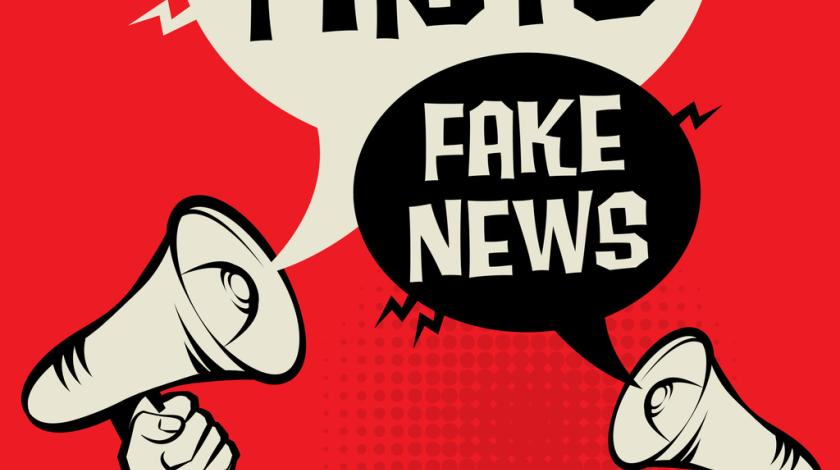

## **1. Introduction**


In the digital era, encountering deceptive or inaccurate content has become increasingly common. This phenomenon has been particularly evident in recent events such as the ongoing COVID-19 pandemic, US elections, and recent military conflicts like Russia-Ukraine and Israel-Hamas. This type of misinformation, often called **"fake news"**, is intentionally fabricated or deceptive content presented as authentic news. It is distributed through various channels such as media and social networks, which mimic the distribution methods of legitimate news sources.
In the current digital landscape, it has become a significant problem, in contrast to the traditional news channels. In the past, newspapers and television had a limited number of distribution channels, which resulted in strict fact-checking and the provision of accurate information. However, with the internet becoming the primary source of information, the ease of sharing content has increased significantly, leading to a rise in unverified information.

This surge in fake news poses a serious problem due to its potential to deceive and manipulate public opinion. False narratives can impact political processes public health, and even contribute to social unrest. The lack of strict editorial oversight and the rapid dissemination of information on digital platforms exacerbate the challenge of distinguishing between genuine and misleading content.

Fortunately, advancements in data science offer a promising solution to the problem of fake news. Today, data analytics tools and sophisticated algorithms can analyze vast amounts of data to detect patterns and anomalies that may indicate misinformation.  
My project aims to use these algorithms to build a predictive model that can determine whether a piece of news is **true** or **false**.  
The goal of developing such a tool is to not only improve the ability to identify fake news but also to contribute to larger efforts to combat the spread of misinformation.   
This project aligns with the growing need for technologically driven solutions to address the challenges posed by fake news in the contemporary information landscape.

## **2. Data Collection**

**Source**: kaggle.com  
**Link**: https://www.kaggle.com/datasets/c010104/fakenewsdetectiondataset?select=Fake.csv

In [ ]:
# pip install ipython==7.10.0

In [ ]:
# Import libraries for data manipulation
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for text preprocessing (NLP)
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Import libraries for transformation (NLP)
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

# Import libraries for ML
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# read csv
df_fake = pd.read_csv('/content/drive/MyDrive/MyProjects/Project1/Dataset/Fake.csv')
df_true = pd.read_csv('/content/drive/MyDrive/MyProjects/Project1/Dataset/True.csv')

## **3. EDA- Exploratory Data Analysis**

Before working with the data, it's essential to understand the dataset's content and nature. Exploratory Data Analysis (EDA) serves this purpose by revealing key patterns and insights within the data. This includes understanding the data structure, identifying patterns, and uncovering potential data issues. The EDA stage will involve the following steps:
1. Displaying general data.
2. Displaying core distributions.




### **3.1. Displaying general data**

In [ ]:
# add a new col for each df, representing the type of data
df_fake["label"] =  0 # false
df_true["label"] = 1 # true

# concat the df
df= pd.concat([df_fake, df_true], ignore_index=True)

In [ ]:
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

# print top records in df (a look of how the data looks like)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# print df info (cols, types and how many non-null values there are)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
# print statistical data
df.describe(include="all")

,title,text,subject,date,label
count,44898,44898,44898,44898,44898.000000
unique,38729,38646,8,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,14,627,11272,182,NaN
mean,NaN,NaN,NaN,NaN,0.477015
std,NaN,NaN,NaN,NaN,0.499477
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,1.000000


**Obeservations-**

* Data frame "df" info-
  * Number of cols: 5.  
  * Number of records: 44898.  
  * Number of categorical features: 5 cols out of total 5 ("object").  
  * Number of categorical features: 0 cols out of total 5.

* Potential inaccuracies and issues including-
  * Duplicates entries- using the method "describe()" on the dataframe highlights the presence of duplicate entries.  
  The observation suggests that there are more records ("count") than unique values ("unique") in columns "text" and "title".  
  This is a concern as duplicate records can potentially bias the algorithm's results. Resolving this issue is essential for maintaining the accuracy of the analysis and will be handled later.
  * Incorrect data types- column "date" displays an incorrect data type compared its values.



### **3.2. Displaying core distributions**


#### **3.2.1. Selected columns distribution**


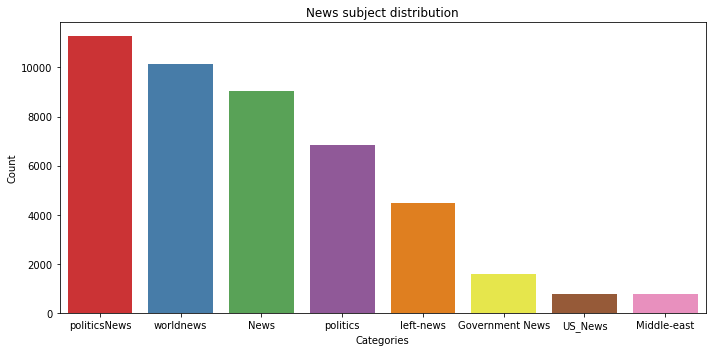

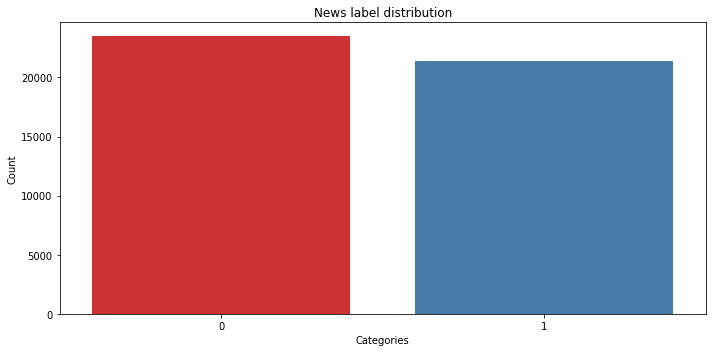

In [ ]:
# select cols
selected_cols = ['subject', 'label']

# create titles for barplots
titles = ["News subject distribution", "News label distribution"]

# loop through every col in "selected_cols"
for col, title in zip(selected_cols, titles):

  # apply "value_counts"
  df_vc =  df[col].value_counts()

  # create barplot
  plt.figure(figsize=(10, 5))
  colors = sns.color_palette('Set1', n_colors=len(df_vc))
  barplot = sns.barplot(x=df_vc.index, y=df_vc, hue=df_vc.index, palette=colors, legend=False)
  plt.title (title)
  plt.xlabel('Categories')
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

**Obeservations-**

* News subject distribution:
  *   "politicsNews" is the most frequently covered category, with 11,272 articles, indicating a focus on political and governmental news. "Worldnews" follows with 10,145 articles, while "News" has 9,050.
  *  Some categories, such as "US_News" and "Middle-East," indicate a geographic emphasis.
  * However, there is an imbalance in coverage, with some categories receiving significantly more articles than others.


* News label distribution-
  * Shows that there are more "fake news" than true news.



#### **3.2.2. Word cloud**

 **"Word cloud"** is a visual representation of the words used
  in a text, where the most common words are emphasized by their larger size.  
  It offers a simple and quick way to get an idea of what a text is about, highlighting prominent terms, themes, and keywords through their frequency. By looking at a word cloud, we can easily identify which words are used the most and get insights into the most significant linguistic patterns in the text. Essentially, it condenses a large amount of textual information into a visually appealing summary, making it easier to understand the main ideas conveyed in the text.

  In this case, using "word cloud" will help me find out which words or topics are repeated in the context of "fake news".

In [ ]:
def word_cloud(my_df, col):
  """Function display word-cloud of given column.
  param my_df: selected df.
  param col: textual column.
  return: nan.
  """
  # create a single string for al the "text" data
  text_data = ' '.join(my_df[col].astype(str))

  # split "text_data" into words
  tokens = word_tokenize(text_data)

  # remove stop words
  filtered_tokens = []
  stop_words = set(STOPWORDS)
  for word in tokens:

    # if word is not a number and its lower case doesnt appeare in "stop_words" append it to "filtered_tokens"
    if word.isalpha() and word.lower() not in stop_words:
      filtered_tokens.append(word.lower())

  # join the filtered tokens back into a single string
  filtered_text = ' '.join(filtered_tokens)

  # generate worldcolud
  wc = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

  # display worldcluod
  plt.figure(figsize=(12, 6))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

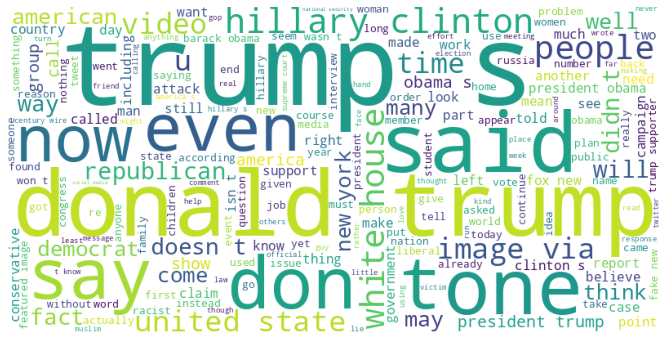

In [ ]:
# merege col "text" and col "title" into a new col
df_fake["content"] = df_fake["title"] +  df_fake["text"]

# apply "word_cloud" on "df_fake"
word_cloud(df_fake, "content")

**Obeservations-**  
Examining the word cloud reveals that the most common themes in the fake news dataset revolve around **prominent figures in the US government**, specifically **Donald Trump** and **Hillary Clinton**.  
The primary focus of the fake news content appears to be on **political news in the US**.


## **4. Data Preprocessing**

Data preprocessing is a process of cleaning and transforming raw data to make it suitable for analysis and ML. Its main goal is to enhance data quality and prepare it for effective analysis or model training using methods such as "data cleaning", "data transformations" and more.  
The Data preprocessing stage will involve the following steps:
1. Data cleaning.
2. Transformations.

#### **4.1. Data Cleaning**

Data cleaning is an essential process that aims to refine and enhance the quality of a dataset. This is achieved by removing errors, managing missing values, and ensuring consistency. The purpose of data cleaning is to make sure that the input data is accurate, reliable, and unbiased, which significantly improves the performance and generalization capabilities of the model. By addressing issues such as biases, outliers, and inconsistencies, data cleaning enhances machine learning models' overall reliability and efficiency. This, in turn, allows these models to learn meaningful patterns and make more accurate predictions.

In, this case "data cleaning" will involve:
1. Removing irrelevant columns.
2. Handling missing values.
3. Deduplication.
4. Text preprocessing.

##### **4.1.1. Removing irrelevant columns**

The first step involved identifying and removing columns that wouldn't significantly impact the analysis. Irrelevant columns are those columns that do not contribute significantly to the analysis or that produce noise.  
In this case, the irrelevant columns are: "title", "date", and "subject". They are irrelevant not only because of the explanation above but also due to potentially prolonged processing time.  
By focusing solely on the "text" column, which forms the core content for the algorithm, we streamlined the preprocessing stage and ensured the model focused on the most relevant information.

In [ ]:
df = df[["text", "label"]]
df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


##### **4.1.2. Handling missing values**

Handling missing values involves addressing data points absent in a dataset by removing or filling them. it's an important step since missing values can introduce bias, affect statistical measures, and lead to incomplete or erroneous conclusions.

While the exploratory data analysis (EDA) phase did not reveal any missing values, unfortunately they still exist in the dataset. For example:
* Missing values were observed under  "date" column after casting was performed.
*  A disparity was observed between the unique values in the "title" and "text" columns and the count after deduplication, implying the presence of non-NaN form missing values.

In [ ]:
# check for missing values in df
display(df.isna().sum())

text     0
label    0
dtype: int64

In [ ]:
# cheack for more missing values, in the form of space (" ")
missing_values = df[df['text'] == ' ']
print("The percentage of missing values is:", str(round(missing_values.shape[0]/df.shape[0]*100,2))+"%.\n")
display (missing_values)

The percentage of missing values is: 1.4%.



,text,label
10923,,0
11041,,0
11190,,0
11225,,0
11236,,0
...,...,...
21826,,0
21827,,0
21857,,0
21873,,0


As we can see, there are indeed records with missing values.
Given the missing values are the product of an entry errors ( having a space instead of text) and the number of missing values is relatively small compared to the total values in the df, I have decided to remove those records.

In [ ]:
# drop the records with missing values
df.drop(missing_values.index, inplace=True)
df.dropna(inplace=True)

# display result
display(df.isna().sum())

text     0
label    0
dtype: int64

##### **4.1.3. Deduplicationn**

Deduplication, also known as "duplicate removal", is a process that identifies and removes duplicate records from a dataset.  
Removing redundant and repetitive data aims to improve data accuracy and integrity while avoiding skewed analyses.

In [ ]:
# create new df for duplicates records under cols "title" and "text"
df_duplicates = df[df.duplicated(subset=['text'], keep='first')]
print ("The percentage of records with duplicate values is: "+
       str(round((df_duplicates.shape[0]/df.shape[0])*100, 2))+"%." )

# remove duplicates
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

The percentage of records with duplicate values is: 12.71%.


In [ ]:
# print final result before text preprocessing
display(df.describe(include="all"))

,text,label
count,38645,38645.000000
unique,38645,NaN
top,Donald Trump just couldn t wish all Americans ...,NaN
freq,1,NaN
mean,NaN,0.548350
std,NaN,0.497663
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


##### **4.1.4. Text preprocessing**

Text preprocessing is a critical step in Natural Language Processing (NLP) that involves refining raw text for modeling. Text data comes from various sources with different characteristics and often contains noise like punctuation, numbers, and symbols. This variability can affect NLP model performance. Therefor "Text preprocessing" is essential- it helps to eliminate this noise, ensuring uniformity and structure in the data. This optimization allows models to focus on meaningful information, enhancing their efficiency and effectiveness.  

There are many techniques for text preprocessing that can be employed. In this project, we'll utilize several common methods:
1. **Tokenization**: breaking down text into smaller units, such as words, sentences, or paragraphs. This helps in segmenting text into meaningful units for NLP models.  
2. **Case conversion**: changing the case of letters to either lower or upper case, reducing text variability.
3. **Lemmatization** : reducing words to their canonical or dictionary form based on part of speech and context. (*It's more accurate and sophisticated than stemming*).
4. **Stopword removal**: eliminates common words like "and", "a" and "the" that don't contribute significantly to the meaning. This reduces noise and focuses on essential words.
5. **Punctuation removal**: envolves eliminating punctuation marks (commas, periods, question marks, etc.) from the text. This step streamlines the text by removing unnecessary symbols.
6. **URL Removal**: this process entails the elimination or replacement of web addresses (URLs) within a text document. This aims to improve the cleanliness of the text and shift the focus toward its core content and meaning.

*Stemming vs Lemmatization- **Stemming** and **Lemmatization** are text normalization techniques.   
**Stemming** works by reducing words to their base form through the removal of suffixes using predefined rules.  
**Lemmatization** on the other hand takes into account context and part of speech, resulting in more accurate and meaningful base forms.   
While stemming may generate non-words, such as reducing "ring" to "r" lemmatization accurately retains the original word, like "ring." Consequently, lemmatization is favored for preserving linguistic accuracy and ensuring meaningful transformations across different contexts.*

In [ ]:
# create objects of class "WordNetLemmatizer"
lemmatizer = WordNetLemmatizer()

In [ ]:
# create def "text_preprocessing"
def text_preprocessing (content):
  """Function preprocessing the content (text/title) using text preprocessing techniques.
  param content: given text/title from df.
  return: clean content.
  """
  clean_content = re.sub(r'https?://\S+|www\.\S+', ' ', content) # URLs removal
  clean_content = re.sub(r'[^a-zA-Z]', ' ', content) # punctuation removal
  clean_content = clean_content.lower() # case conversion
  clean_content = clean_content.split() # split content into words
  clean_content = [lemmatizer.lemmatize(word) for word in clean_content if word not in stopwords.words('english')] # apply lemmatization and remove stop words
  clean_content = ' '.join(clean_content) # join the words back to text/title
  return clean_content

In [ ]:
# apply "text_preprocessing" on col "text"
df['text'] = df['text'].apply(text_preprocessing)

#### **4.2. Transformation**

Transformation is the process that alters the form or representation of data, often to make it more suitable for analysis or modeling.   
The most important step in this process is converting the data from textual values to numeric values, since the text itself is too complex for direct processing, necessitating its conversion into numerical representations(the learning algorithm does not know how to work with values that are not numbers).   
To do this, we use a technique called **"TF-IDF"**.  
This technique breaks down the text into individual terms, analyzes their frequency within each document and the entire collection, and assigns weights based on their relative importance. The resulting numerical matrix allows algorithms to understand the text and highlight key terms, which makes it easier to find the most relevant content.

In [ ]:
# create object and preform transformation on "text"
vectorizer = TfidfVectorizer()
text_vectorized = vectorizer.fit_transform(df['text'])

## **5. Model**

Once the data has been prepared for the model, the final stage is to prepare and run the model. As we aim for definitive "yes" or "no" answers based on past cases, this translates to a **binary classification problem within supervised learning**. The chosen model will deliver the coveted outputs.  
The Model stage will involve the following steps:
1. Running the model.
2. Model evaluation.

### **5.1. Running The Model**

In this stage I will put the model into action meaning I will release the trained model onto previously unseen data, allowing it to make predictions based on the patterns it assimilated during training.    
This stage involves:
1. Splitting the data into "Features" and "Target":  separate the influencing factors (features) from the outcome they predict (target).   
In this case: Feature(X) is "text" and Target(y) is "target".
2. Splitting the data into "train" and "test" sets:  separate the data into different sets where "Train" is for training the model and contains 20% of the overall data.
And "Test" is for testing the model on unseen data or to evaluate its performance on new data. "Tets" contains 80% of the overall data.
In this case: the train is 20% and the test is 80% (X_train, X_test, y_train, y_test)
3. Training the model:  applying the model on the train set (features and target) using the model "**logistic regression**". This is a statistical model that models the probability of an event (out of two alternatives). This takes place by having the exponent be a linear combination of one or more independent variables ("predictors").

In [ ]:
# split the data to: features and labels
features = text_vectorized
labels = df["label"]

# split features and labels to: traind and test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=123)

# create class object
clf= LogisticRegression(random_state=100)

# train the model
clf.fit(X_train, y_train)

LogisticRegression(random_state=100)

### **5.2. Model Evaluation**

At this stage, I will assess the accuracy of the model by checking its performance with the following tools and measures:
1. **Confusion matrix**: a table that visualizes the performance of a classification model by displaying the counts of-
  * True Positives (TP): Correctly predicted positive cases.
  * False Positives (FP): Incorrectly predicted positive cases (actually negative).
  * True Negatives (TN): Correctly predicted negative cases.
  * False Negatives (FN): Missed positive cases (predicted negative)
2. **Accuracy**: The overall proportion of correct predictions.  
calculated as- (TP + TN) / (Total).
3. **Precision**: Measures the proportion of predicted positive cases that were positive.  
calculated as- (TP / (TP + FP)).
4. **Recall**: Measures the proportion of actual positive cases the model correctly identified.  
calculated as- (TP / (TP + FN)).

Performance metrics will be calculated for both the "train" and "test" sets. The idea is to compare the metrics and ensure that they are consistent and close to 100% (Appropriate fit). Based on the results, the model's performance will fall into one of three categories:
1. **Appropriate fit**: The model generalizes well to unseen data, balancing accuracy, recall, and precision.
2. **Underfitting**: The model fails to capture the underlying patterns in the data, leading to poor performance on both train and test sets.
3. **Overfitting**: The model learns the training data too well, leading to high accuracy on the training set but poor performance on test data.

In [ ]:
def model_evaluation(x,y):
  """Function calcs accuracy, precision, recall for train and test.
  param x: X_train/ X_test
  param y: y_train/y_test
  return: accuracy, precision, recall.
  """

  # make predictions on "x_train" and "x_test"
  y_pred = clf.predict(x)

  # calc: accuracy, precision, recall.
  accuracy =  str((round(accuracy_score(y, y_pred),2) * 100)) +"%"
  precision = str((round(precision_score(y, y_pred),2) * 100))+ "%"
  recall = str((round(recall_score(y, y_pred),2) * 100))+ "%"
  ct = pd.crosstab(y, y_pred, colnames=['pred'], margins=True)

  return accuracy, precision, recall, ct

In [ ]:
# apply "model_evaluation" on "train" and "test"
accuracy_train, precision_train, recall_train, crosstab_train = model_evaluation(X_train, y_train)
accuracy_test, precision_test, recall_test, crosstab_test = model_evaluation(X_test, y_test)

# creat new df and add "model_evaluation" results to it
data = {'type': ['Train', 'Test'],
        'Accuracy': [accuracy_train, accuracy_test],
        'Precision': [precision_train, precision_test],
        'Recall': [recall_train, recall_test]}
df_metrics = pd.DataFrame(data)
print("\nMatrix for 'train' and 'test':")
display(df_metrics)

# print results confusion matrix
print ("Train confusion matrix:")
display(crosstab_train)
print ("\nTest confusion matrix:")
display(crosstab_test)


Matrix for 'train' and 'test':


,type,Accuracy,Precision,Recall
0,Train,99.0%,99.0%,99.0%
1,Test,98.0%,98.0%,99.0%


Train confusion matrix:


pred,0,1,All
label,,,
0,13805,202,14007
1,96,16813,16909
All,13901,17015,30916



Test confusion matrix:


pred,0,1,All
label,,,
0,3365,82,3447
1,47,4235,4282
All,3412,4317,7729


**Observison**:  
As observed, both the "train" and "test" metrics are high, nearing 100%, and identical, suggesting an appropriate fit. This result (appropriate fit) signifies the model's successful accomplishment of its objective.

In [ ]:
# create fake and true news
fake_news = "Scientists Confirm Alien Invasion! Unprecedented UFO Activity Detected"
true_news = "U.S. Senate Approves Tax Reform Bill in Landmark Victory for Republicans"

# vectorized news
fake_vectorized = vectorizer.transform([fake_news])
true_vectorized = vectorizer.transform([true_news])

# predict if true or not
prediction1 = clf.predict(fake_vectorized)
prediction2 = clf.predict(true_vectorized)

# print results
list_news = ["Fake_news", "True_news"]
list_predictions = [prediction1, prediction2]
for news, prediction in zip(list_news, list_predictions):
  if prediction == 0:
    print("For " + news + " predict: False.")
  else:
    print("For " + news + " predict: True.")

For Fake_news predict: False.
For True_news predict: True.


## **6. Summary And Conclusions**

This project addressed the pervasive issue of fake news by developing a tool that allows users to navigate the information landscape with greater discernment. Focusing on the politically charged domain, I used logistic regression, a supervised learning technique, to identify patterns in a dataset of 44,898 news articles labeled true or false.

The project comprised the following steps:
1. Problem Definition: I discussed the complexities of fake news, its consequences, and the critical need for effective detection methods.
2. Data Collection: I obtained a dataset from Kaggle that included both true and false news articles.
3. Exploratory data analysis (EDA): After merging the datasets into one unified data frame I was able to thoroughly examine the data, identifying its characteristics, potential biases, and areas for improvement.
4. Data Preprocessing: I carefully prepared the data for the learning model, using natural language processing (NLP) techniques to clean, standardize, and extract meaningful features.
5. Model Development and Evaluation: Using **logistic regression** principles, I built a strong model capable of distinguishing between truth and falsehood. A thorough evaluation confirmed its "appropriate fit," demonstrating its potential as an effective tool in the fight against fake news.

**Important to note:**  
While the current model excels in the political domain, its underlying framework can be applied to a variety of topics, broadening its scope and impact. Future iterations will include more data sources, more sophisticated algorithms, and improved NLP techniques to achieve even greater accuracy.

**Project progress:**  
This project provided useful insights into the world of fake news and the power of data-driven solutions. Its impact goes beyond technical proficiency, encouraging critical thinking and empowering individuals to make informed decisions. As I improve this tool, I help advance a larger movement toward a more informed and empowered society where truth prevails over deceit.
